In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from tqdm import tqdm

# disable warnings
import warnings
warnings.filterwarnings('ignore')

# show more colums
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

/opt/homebrew/Caskroom/miniconda/base/envs/ml_env/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df = pd.read_csv("../data/LGA_Flights_Arrival_Dep.csv")
df.head()

,FlightDate,DepDelay,DepTimeMinutes,TaxiOut,ArrDelay,Distance,CRSElapsedTime,CRSArrTime,DayOfWeek,Year,Month,AverageDelayPerFlightNumber,AverageDelayPerDistanceGroup,AverageDelayPerAircraft,Origin_AGS,Origin_ATL,Origin_BOS,Origin_BTV,Origin_BUF,Origin_BZN,Origin_CLE,Origin_CLT,Origin_CMH,Origin_CVG,Origin_DEN,Origin_DFW,Origin_DTW,Origin_FLL,Origin_GRR,Origin_IAH,Origin_IND,Origin_JAX,Origin_MCO,Origin_MIA,Origin_MSN,Origin_MSP,Origin_MSY,Origin_MYR,Origin_OMA,Origin_ORD,Origin_PBI,Origin_PWM,Origin_RIC,Origin_RSW,Origin_SDF,Origin_SRQ,Origin_STL,Origin_SYR,Origin_TPA,Origin_TVC
0,2018-01-01,-1.0,516.0,14.0,-20.0,502.0,83.0,640,1,2018,1,0.0,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2018-01-01,32.0,918.0,27.0,18.0,1076.0,143.0,1069,1,2018,1,0.0,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2018-01-01,-3.0,637.0,14.0,-25.0,950.0,111.0,791,1,2018,1,0.0,4.250000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2018-01-01,56.0,986.0,13.0,36.0,950.0,116.0,1086,1,2018,1,0.0,1.888889,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2018-01-01,0.0,795.0,12.0,-22.0,1096.0,140.0,975,1,2018,1,0.0,5.461538,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
df_train = df[df["FlightDate"] < "2019-10-01"]
df_test = df[df["FlightDate"] >= "2019-10-01"]

# drop FlightDate
df_train = df_train.drop("FlightDate", axis=1)
df_test = df_test.drop("FlightDate", axis=1)

# drop CRSDepTime
# df_train = df_train.drop("CRSDepTime", axis=1)
# df_test = df_test.drop("CRSDepTime", axis=1)

# Get the arrays
X_train, y_train = df_train.drop("ArrDelay", axis=1), df_train["ArrDelay"]
X_test, y_test = df_test.drop("ArrDelay", axis=1), df_test["ArrDelay"]

# Linear Regression

In [4]:
# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The mean squared error
print("Root Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))

# The MAE
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Root Mean squared error: 12.10
Mean absolute error: 9.65
Coefficient of determination: 0.95


# Random Forest

In [5]:
# Create a random forest
rf = RandomForestRegressor(n_estimators=100, random_state=1601)

# Train the model using the training sets
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=1601)

Root Mean Squared Error: 11.30
Mean absolute error: 8.24
Coefficient of determination: 0.96


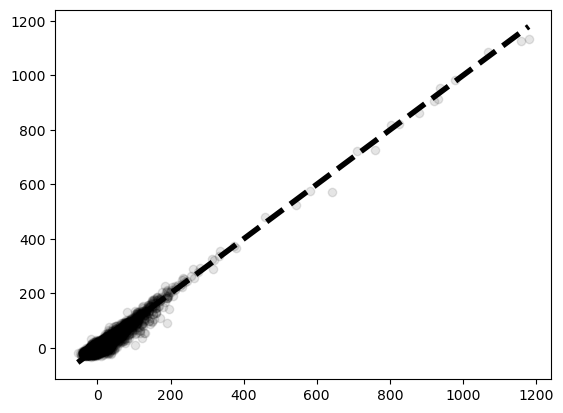

In [6]:
# Make predictions using the testing set
y_pred = rf.predict(X_test)

# The mean squared error
print("Root Mean Squared Error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))

# The MAE
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# plot the results
plt.scatter(y_test, y_pred, color="black", alpha=0.1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=4)

<AxesSubplot:title={'center':'XGBoost Feature Importance'}>

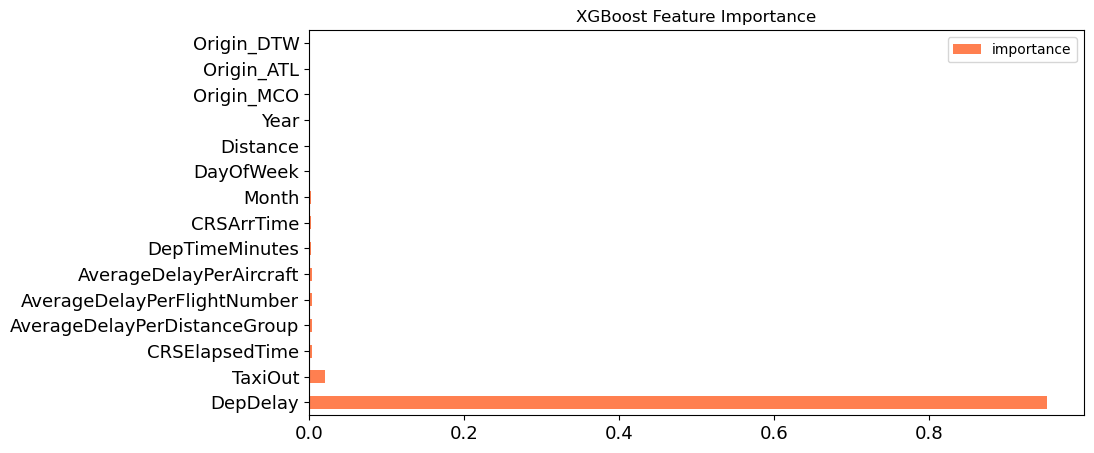

In [7]:
## feature importance
feature_importance = pd.DataFrame(
    rf.feature_importances_, index=X_train.columns, columns=["importance"]
).sort_values("importance", ascending=False)

# get the 50 most important features
feature_importance = feature_importance.iloc[:15]

feature_importance.plot(
    kind="barh",
    figsize=(10, 5),
    color="coral",
    fontsize=13,
    title="XGBoost Feature Importance",
)

# XGBoost

In [8]:
# XGBoost Regressor
xgb = XGBRegressor(n_estimators=100, random_state=1601)

# Train the model using the training sets
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=10,
             num_parallel_tree=1, predictor='auto', random_state=1601,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

Root Mean squared error: 11.20
Mean absolute error: 8.18
Coefficient of determination: 0.96


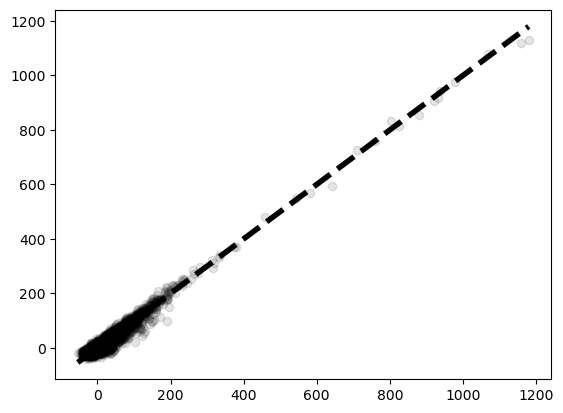

In [9]:
# Make predictions using the testing set
y_pred = xgb.predict(X_test)

# The mean squared error
print("Root Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))

# The MAE
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# plot the results
plt.scatter(y_test, y_pred, color="black", alpha=0.1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=4)

<AxesSubplot:title={'center':'XGBoost Feature Importance'}>

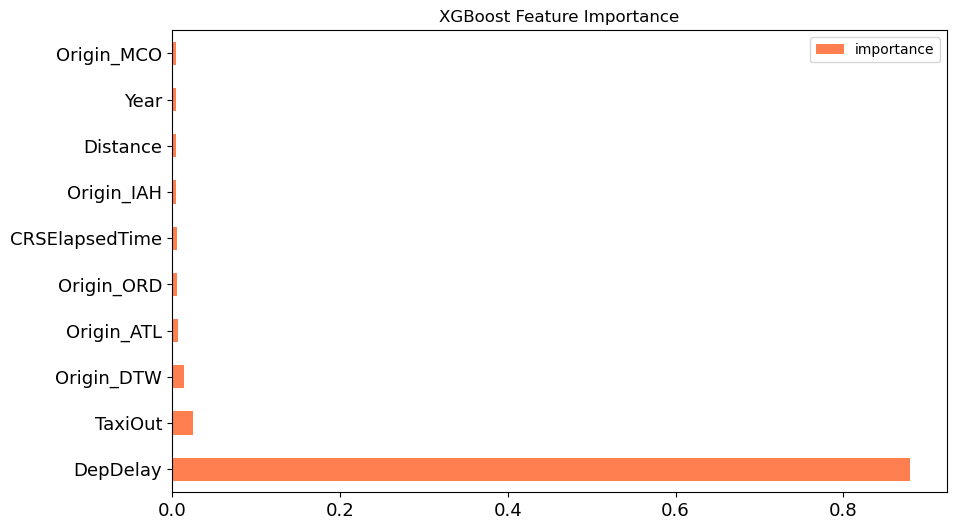

In [10]:
## feature importance
feature_importance = pd.DataFrame(
    xgb.feature_importances_, index=X_train.columns, columns=["importance"]
).sort_values("importance", ascending=False)

# get the 50 most important features
feature_importance = feature_importance.iloc[:10]

feature_importance.plot(
    kind="barh",
    figsize=(10, 6),
    color="coral",
    fontsize=13,
    title="XGBoost Feature Importance",
)

In [11]:
# pplot the CRSArrTime
df["CRSDepTime"].hist(bins=1000)

KeyError: 'CRSDepTime'